In [1]:
using BenchmarkTools, Plots, LoopVectorization

In [2]:
@btime A=[((y-50)^2/20^2+(x-50)^2/40^2 < 1) ? 1 : 0 for y ∈ 1:100, x ∈ 1:100]

  19.344 μs (2 allocations: 78.17 KiB)


100×100 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [3]:
B=zeros(Int64, (100, 100))
@btime begin
    @turbo for y ∈ 1:100, x ∈ 1:100
        B[y, x] = ((y-50)^2/20^2+(x-50)^2/40^2 < 1) ? 1 : 0
    end
end

  7.485 μs (11 allocations: 320 bytes)


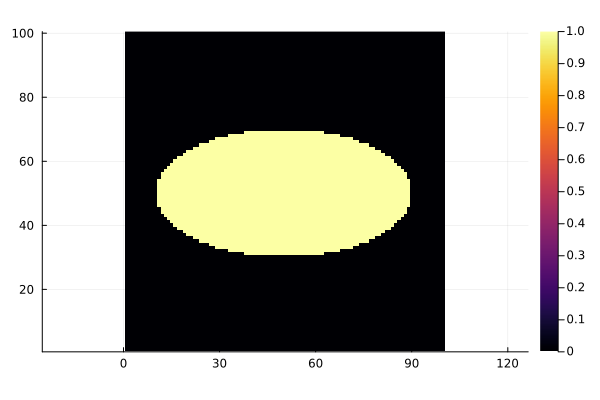

In [4]:
heatmap(B, aspect_ratio = :equal)

In [5]:
xp = 1:10
yp = (xp).^2 .+ (rand(length(xp)) .- 0.5)

10-element Vector{Float64}:
  1.4045554144514816
  4.240366606386104
  8.836348029268201
 16.391146100485482
 25.013488378080346
 36.29571244716079
 48.657474777274324
 63.99612555550667
 81.09615796793902
 99.88242015821058

In [7]:
V1 = zeros(Int64,(10, 10))
@btime begin
for i ∈ 1:10, j ∈ 1:10
    V1[i, j] = i^(j-1)
end
end

@btime V2 = [i^(j-1) for i ∈ 1:10, j ∈ 1:10]

  2.748 μs (49 allocations: 784 bytes)
  399.895 ns (1 allocation: 896 bytes)


10×10 Matrix{Int64}:
 1   1    1     1      1       1        1         1          1           1
 1   2    4     8     16      32       64       128        256         512
 1   3    9    27     81     243      729      2187       6561       19683
 1   4   16    64    256    1024     4096     16384      65536      262144
 1   5   25   125    625    3125    15625     78125     390625     1953125
 1   6   36   216   1296    7776    46656    279936    1679616    10077696
 1   7   49   343   2401   16807   117649    823543    5764801    40353607
 1   8   64   512   4096   32768   262144   2097152   16777216   134217728
 1   9   81   729   6561   59049   531441   4782969   43046721   387420489
 1  10  100  1000  10000  100000  1000000  10000000  100000000  1000000000

In [9]:
V1 = zeros(Int64,(10, 10))
for i ∈ 1:10, j ∈ 1:10
    V1[i, j] = i^(j-1)
end

V2 = [i^(j-1) for i ∈ 1:10, j ∈ 1:10]

10×10 Matrix{Int64}:
 1   1    1     1      1       1        1         1          1           1
 1   2    4     8     16      32       64       128        256         512
 1   3    9    27     81     243      729      2187       6561       19683
 1   4   16    64    256    1024     4096     16384      65536      262144
 1   5   25   125    625    3125    15625     78125     390625     1953125
 1   6   36   216   1296    7776    46656    279936    1679616    10077696
 1   7   49   343   2401   16807   117649    823543    5764801    40353607
 1   8   64   512   4096   32768   262144   2097152   16777216   134217728
 1   9   81   729   6561   59049   531441   4782969   43046721   387420489
 1  10  100  1000  10000  100000  1000000  10000000  100000000  1000000000

In [10]:
struct mysingleton <: Function
end

(p::mysingleton)(x) = x+1

"""
madd singoleton
"""
madd = mysingleton()


madd

In [12]:
struct OverSpeedOfLightException <: Exception
    speed::Number
    msg::String
end

In [13]:
throw(OverSpeedOfLightException(10000000, "speed must be smaller than c"))

OverSpeedOfLightException: OverSpeedOfLightException(10000000, "speed must be smaller than c")

In [1]:
function mysqrt(x::Real)
    if x < 0
        throw(ErrorException("Arguements must be non-negative"))
    end
    return sqrt(x)
end

mysqrt (generic function with 1 method)

In [4]:
mysqrt(3.3+2im)

MethodError: MethodError: no method matching mysqrt(::ComplexF64)

Closest candidates are:
  mysqrt(!Matched::Real)
   @ Main ~/Documents/Projects/NumericalAnalysisJulia/src/introduction_to_julia/julia05.ipynb:1


In [5]:
Base.@kwdef mutable struct ms
    a::Int
    b::Int
end

c=ms(1, 1)
Threads.@threads for i in 1:10
    c.a = i
    c.b +=c.a*i
end
println(c)

ms(1, 304)


In [33]:
c=ms(1, 1)
Threads.@threads for i in 1:10
    c.a = i
    c.b +=c.a*i
end
println(c)

ms(2, 386)


In [7]:
lk = Threads.ReentrantLock()
d=ms(1, 1)
Threads.@threads for i in 1:10
    lock(lk) do
        d.a = i
        d.b +=d.a*i
    end
end
println(d)

ms(5, 386)


In [12]:
d=ms(1, 1)
Threads.@threads for i in 1:10
    lock(lk) do
        d.a = i
        d.b +=d.a*i
    end
end
println(d)

ms(4, 386)
